Authors: Vikrant Satish Pawar

# ABSTRACT

In this notebook we'll go through the concepts of casuality and how we used it to explain the different Causal Inference Techniques establishing causal relationships between variables. Causal Inference is important for making informed decisions and predictions based on data, as it involves understanding the direct impact of one variables on another. This notebook elucidates the topics and provides practical code implementations for the same

# TABLE OF CONTENT


1.   Introduction
2.   Loading and Processing Data
3.   Exploratory Data Analysis (EDA)
4.   Causal Inference Techniques

  4.1. Multiple Linear Regression Analysis

  4.2. Propensity Score Matching

  4.3. Difference-in-Differences (DiD)

  4.4 Directed Acyclic Graphs (DAGs)

5.   Conclusion

# INTRODUCTION

Causality is a foundational concept in many fields, including statistics, science, economics, and philosophy. At its core, causality seeks to answer questions of how and why certain events occur, focusing on the relationships that dictate the effect of one variable or event on another. In a causal relationship, a change in one variable (the cause) is responsible for a change in another variable (the effect). This concept is central to understanding the dynamics of our world, from the physical sciences to human behavior.

The philosophical underpinnings of causality can be traced back to ancient philosophers. Aristotle, for example, proposed four types of causes - material, formal, efficient, and final - that explained why things happen in the world. In modern times, the concept has evolved, particularly with the development of statistical and experimental methods that offer a more empirical approach to understanding causality.

In statistics and research, causality is often contrasted with correlation. Correlation refers to a relationship between two variables where they move together in some predictable pattern, but this movement does not imply that one variable is causing the change in the other. For example, ice cream sales and drowning incidents may be correlated (both increase in summer), but ice cream sales do not cause drowning incidents. Establishing causality goes beyond observing this correlation; it requires evidence that changes in one variable are responsible for changes in another.

There are several criteria commonly used to establish a causal relationship, primarily derived from the work of the 20th-century statistician Sir Austin Bradford Hill. These include:


Strength of Association: Stronger associations are more likely to be causal.


Consistency: The relationship is consistently observed across different studies and contexts.


Specificity: A specific cause leads to a specific effect.


Temporality: The cause must precede the effect in time.


Biological Gradient: Greater exposure to the potential cause leads to greater incidence of the effect.


Plausibility: There is a plausible mechanism between cause and effect.


Coherence: The relationship is coherent with existing knowledge and theory.


Experiment: Causal relationships are more likely if evidence is based on experiments.


Analogy: If similar factors have been shown to be causes in other scenarios.


In practice, establishing causality can be challenging, especially in observational studies where controlled experiments are not feasible. Researchers often rely on statistical methods to infer causality, such as regression analysis, propensity score matching, and instrumental variable analysis. These methods attempt to control for confounding variables that might otherwise bias the results.

Randomized Controlled Trials (RCTs) are considered the gold standard for establishing causality in many fields, particularly in clinical research. In RCTs, participants are randomly assigned to either the treatment group or the control group, helping to ensure that any observed effects are due to the treatment itself and not some other confounding factor.

In recent years, the field of causal inference has been revolutionized by the introduction of frameworks such as Judea Pearl's Causal Diagrams (Directed Acyclic Graphs or DAGs) and Rubin's Causal Model. These frameworks provide a structured approach to thinking about and analyzing causal relationships, allowing researchers to more accurately model and test their hypotheses about how different variables interact.

Understanding causality is essential for making informed decisions in policy-making, business, healthcare, and various scientific disciplines. It enables us to predict the consequences of our actions and interventions, providing a basis for making choices that can lead to desired outcomes. As our world becomes increasingly complex and data-driven, the ability to discern causal relationships becomes ever more critical in guiding our understanding and shaping our future.

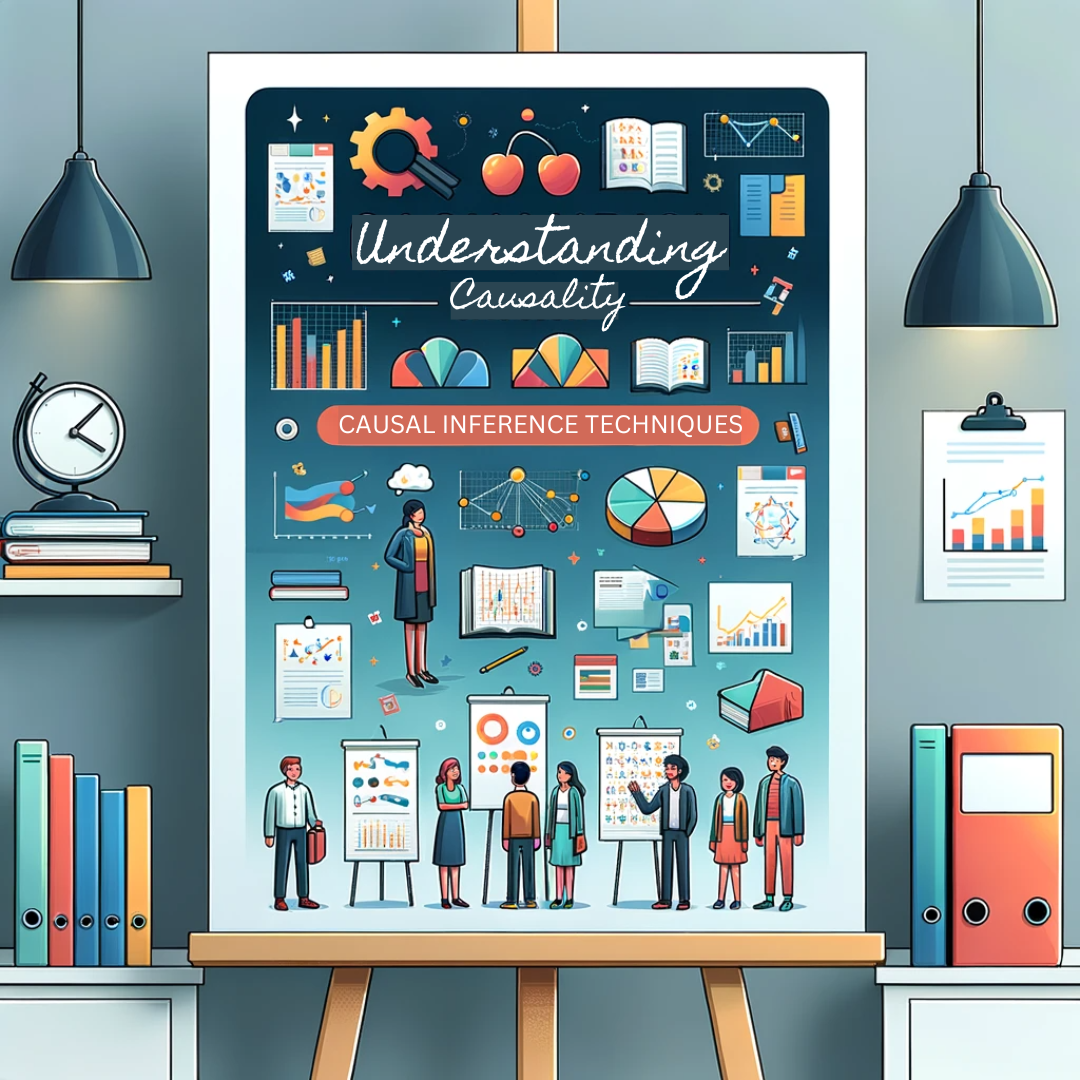Authors: Vikrant Pawar

# Loading and Preprocessing Data

This initial step is fundamental in any data analysis process. Loading the dataset correctly is crucial for a smooth analysis journey. The pandas library is used for its powerful data manipulation capabilities, making the handling of CSV files straightforward. After loading, it's imperative to check for missing values, as they can significantly impact the quality of the analysis. Missing data can lead to biased estimates and can affect the model's performance. In our dataset, the absence of missing values indicates good data quality. The next essential step is converting categorical data into a numeric format. Many machine learning algorithms cannot handle categorical variables directly. They require all input data and features to be numerical. This necessity is where Label Encoding comes in, transforming categorical labels into a numeric form. This encoding ensures that the algorithms used later in the analysis can process the data effectively.



In [ ]:
#IMPORTING
import pandas as pd
import numpy as np
import zipfile
import io

In [ ]:
data = pd.read_csv('/content/student-mat.csv', sep=';')


In [ ]:
# Display the first few rows
print(data.head())

  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0      4        3      4     1     1      3        6   5   6   6  
1      5        3      3     1     1      3        4   5   5   6  
2      4        3      2     2     3      3       10   7   8  10  
3      3        2      2     1     1      5        2  15  14  15  
4      4        3      2     1     2      5        4   6  10  10  

[5 rows x 33 columns]


In [ ]:
# Check for missing values
missing_values = data.isnull().sum()
print("Missing values in each column:\n", missing_values)

Missing values in each column:
 school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64


In [ ]:
# Perform Label Encoding for categorical variables
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
for column in data.columns:
    if data[column].dtype == 'object':
        data[column] = label_encoder.fit_transform(data[column])

In [ ]:
# Display the processed data
print(data.head())


   school  sex  age  address  famsize  Pstatus  Medu  Fedu  Mjob  Fjob  ...  \
0       0    0   18        1        0        0     4     4     0     4  ...   
1       0    0   17        1        0        1     1     1     0     2  ...   
2       0    0   15        1        1        1     1     1     0     2  ...   
3       0    0   15        1        0        1     4     2     1     3  ...   
4       0    0   16        1        0        1     3     3     2     2  ...   

   famrel  freetime  goout  Dalc  Walc  health  absences  G1  G2  G3  
0       4         3      4     1     1       3         6   5   6   6  
1       5         3      3     1     1       3         4   5   5   6  
2       4         3      2     2     3       3        10   7   8  10  
3       3         2      2     1     1       5         2  15  14  15  
4       4         3      2     1     2       5         4   6  10  10  

[5 rows x 33 columns]


In [ ]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   school      395 non-null    int64
 1   sex         395 non-null    int64
 2   age         395 non-null    int64
 3   address     395 non-null    int64
 4   famsize     395 non-null    int64
 5   Pstatus     395 non-null    int64
 6   Medu        395 non-null    int64
 7   Fedu        395 non-null    int64
 8   Mjob        395 non-null    int64
 9   Fjob        395 non-null    int64
 10  reason      395 non-null    int64
 11  guardian    395 non-null    int64
 12  traveltime  395 non-null    int64
 13  studytime   395 non-null    int64
 14  failures    395 non-null    int64
 15  schoolsup   395 non-null    int64
 16  famsup      395 non-null    int64
 17  paid        395 non-null    int64
 18  activities  395 non-null    int64
 19  nursery     395 non-null    int64
 20  higher      395 non-null    int6

In [ ]:
data['studytime'] = pd.to_numeric(data['studytime'], errors='coerce')


# Exploratory Data Analysis (EDA)

EDA is a critical phase where you get to 'know' our data. It's about uncovering patterns, spotting anomalies, and formulating hypotheses based on visual and quantitative insights. The correlation matrix is particularly insightful, revealing how different variables relate to each other. In the context of a school dataset, understanding these relationships can provide educational insights, like how study time correlates with final grades. The scatter plots further this exploration by providing a visual representation of these relationships. For example, plotting 'studytime' against 'G3' (final grades) might reveal a trend or pattern, offering a preliminary glimpse into potential causal relationships. EDA is not just about plotting graphs; it's a thoughtful process of understanding the underlying structures and stories the data tells, guiding subsequent in-depth analyses.

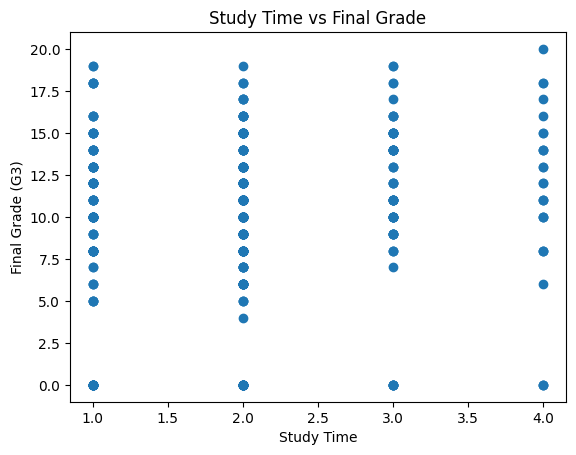

In [ ]:
import matplotlib.pyplot as plt

# Plotting 'studytime' against 'G3'
plt.scatter(data['studytime'], data['G3'])
plt.title('Study Time vs Final Grade')
plt.xlabel('Study Time')
plt.ylabel('Final Grade (G3)')
plt.show()


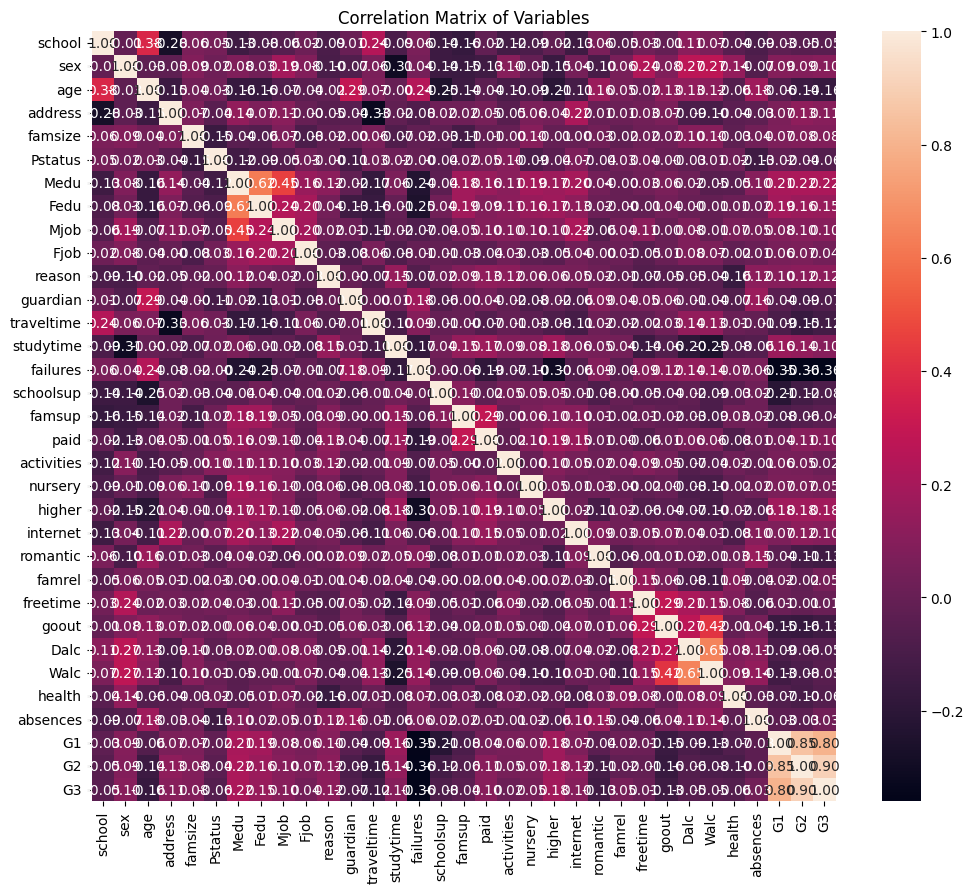

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Analyzing the correlation between different variables
plt.figure(figsize=(12, 10))
sns.heatmap(data.corr(), annot=True, fmt='.2f')
plt.title('Correlation Matrix of Variables')
plt.show()




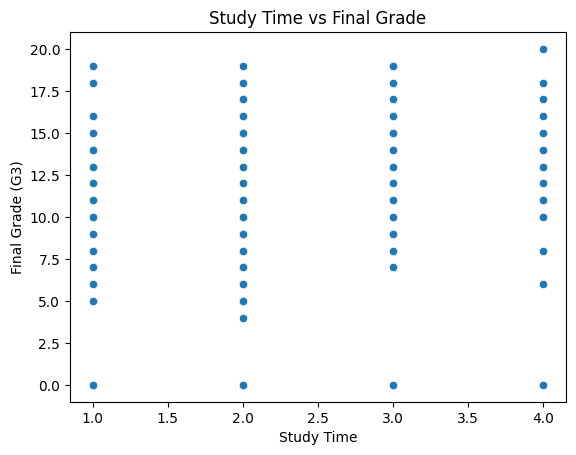

In [ ]:
# Visualizing the relationship between study time and final grades
sns.scatterplot(data=data, x='studytime', y='G3')
plt.title('Study Time vs Final Grade')
plt.xlabel('Study Time')
plt.ylabel('Final Grade (G3)')
plt.show()

# Causal Inference Techniques

Causal inference techniques are methods used in statistics and data science to infer and draw conclusions about cause-and-effect relationships from observational or experimental data. These techniques aim to go beyond simple correlation and establish a more meaningful understanding of how one variable influences another.



**1. Multiple Linear Regression Analysis**

Multiple Linear Regression is a statistical technique used to understand the relationship between one dependent variable and several independent variables. In our analysis, this method aims to discern how various factors like study time, failures, absences, free time, and health collectively influence students' final grades. Each coefficient in the regression output represents the effect of one independent variable on the dependent variable, holding all other variables constant. This nuanced understanding is crucial for educational strategies – for example, understanding whether interventions to reduce failures or increase study time would be more effective. The Mean Squared Error (MSE) of the model is a measure of the average squared difference between the observed actual outcomes and the outcomes predicted by the model. A lower MSE indicates a model that more accurately fits the data.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [ ]:
# Selecting multiple variables for a comprehensive analysis
X = data[['studytime', 'failures', 'absences', 'freetime', 'health']]
y = data['G3']

In [ ]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Implementing Linear Regression to analyze potential causal relationships
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Evaluating the model's performance
predictions = model.predict(X_test)
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)
print(f'Mean Squared Error: {mean_squared_error(y_test, predictions)}')

Coefficients: [ 0.53237484 -2.27672656  0.04246191  0.19671321 -0.13595711]
Intercept: 9.594239066073444
Mean Squared Error: 19.745818087962366


**INSIGHTS**

The intercept, 9.594239066073444, is the estimated mean value of the target variable when all predictor variables are zero. It provides an anchor point for the regression line. The Mean Squared Error is a measure of the average squared difference between the observed and predicted values. In this case, the MSE is 19.75. Lower MSE values indicate a better fit of the model to the data.

**2. Propensity Score Matching**

Propensity Score Matching (PSM) is a statistical technique in causal inference to estimate the effect of a treatment by accounting for covariates that predict receiving the treatment. In the context of this analysis, PSM is used to assess the impact of extra educational support on student performance. This method attempts to mimic a randomized experimental design using observational study data, thus helping to reduce selection bias. The Average Treatment Effect (ATE), Average Treatment effect on the Control group (ATC), and Average Treatment effect on the Treated group (ATT) are key metrics derived from this analysis. Although our results show a negative effect of the treatment on grades, the high p-values indicate that these findings are not statistically significant, suggesting caution in interpreting these results as definitive.



In [ ]:
!pip install causalinference

In [ ]:
from causalinference import CausalModel
import numpy as np

# Defining Y, D, and X
Y = data['G3'].values  # Outcome variable
D = data['schoolsup'].values  # Treatment variable (binary)
X_columns = ['age', 'studytime', 'failures', 'famrel', 'freetime', 'goout', 'health', 'absences']  # Covariates
X = data[X_columns].values

# Creating and estimating the Causal Model
causal = CausalModel(Y, D, X)
causal.est_propensity_s()


In [ ]:
# Check data types of Y, D, and X
print("Y data type:", Y.dtype)
print("D data type:", D.dtype)
print("X data types:", [X[:, i].dtype for i in range(X.shape[1])])




Y data type: int64
D data type: int64
X data types: [dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64')]


In [ ]:
# Check unique values of the binary treatment variable (D)
print("Unique values in D:", np.unique(D))

Unique values in D: [0 1]


In [ ]:
# Re-run the causal model setup and matching
causal = CausalModel(Y, D, X)
causal.est_propensity_s()
causal.est_via_matching()
print("Causal Estimates:\n", causal.estimates)

Causal Estimates:
 
Treatment Effect Estimates: Matching

                     Est.       S.e.          z      P>|z|      [95% Conf. int.]
--------------------------------------------------------------------------------
           ATE     -1.287      1.044     -1.233      0.218     -3.334      0.760
           ATC     -1.234      1.102     -1.119      0.263     -3.395      0.927
           ATT     -1.647      1.131     -1.456      0.145     -3.864      0.569



**INSIGHTS**

ATE: The Average Treatment Effect represents the average causal effect of the treatment across the entire population. In this case, the estimated ATE is -1.287, but it is not statistically significant at the 0.05 significance level (p-value > 0.05).

ATC: The Average Treatment Effect on the Control Group represents the average causal effect of the treatment for the control group. Similar to ATE, the estimated ATC is -1.234, but it is not statistically significant.

ATT: The Average Treatment Effect on the Treated Group represents the average causal effect of the treatment for the treated group. The estimated ATT is -1.647, and it is not statistically significant.

P-Values: The p-values associated with each estimate indicate whether the estimated effects are statistically significant. A low p-value (typically < 0.05) suggests that the estimate is unlikely to be the result of random chance.

Confidence Intervals: The 95% confidence intervals provide a range of values within which we can reasonably expect the true effect to lie. If the interval includes zero, it suggests that the effect is not statistically significant.

Interpretation: In this context, negative estimates suggest a reduction in the outcome variable due to the treatment. However, the lack of statistical significance in the p-values suggests that these effects may not be reliable.

**3. Difference-in-Differences (DiD)**

Difference-in-Differences (DiD) is a quantitative research design used to measure the effect of a specific intervention or treatment by comparing the changes in outcomes over time between a control group and a treatment group. In our analysis, we've used 'age' as a proxy for this 'before and after' comparison, dividing the dataset into two age-based groups. The negative DiD estimate suggests that there's a decrease in final grades as age increases, but this interpretation requires careful consideration. The choice of age as a proxy for time may not capture the true causal effect of the intervention, and other confounding variables might influence this outcome. DiD is a powerful tool for causal inference, particularly in policy evaluation and social science research, as it helps control for unobserved variables that might be constant over time.



In [ ]:
# For DiD, we need a 'before' and 'after' scenario. Let's assume 'age' as a proxy for time.
# We divide the dataset into two based on age and compare the average grade (G3) before and after a certain age.

# Creating 'before' and 'after' datasets
before = data[data['age'] < 17]  # Assuming age 17 as the cut-off
after = data[data['age'] >= 17]

# Computing average grades before and after
avg_grade_before = before['G3'].mean()
avg_grade_after = after['G3'].mean()

# Difference-in-Differences calculation
DiD = (avg_grade_after - avg_grade_before)
print("Difference-in-Differences Estimate:", DiD)


Difference-in-Differences Estimate: -1.3491279518444195


**INSIGHTS**

The DiD estimate of -1.3491 represents the average causal effect of the treatment by taking the difference in the average outcome change between the treatment group and the control group before and after the treatment.

**4. Directed Acyclic Graphs (DAGs)**

Directed Acyclic Graphs (DAGs) are used in causal inference to represent and reason about the assumptions of causal relationships. They are particularly useful for visualizing and identifying potential confounding variables that need to be controlled for in a causal analysis. In the DAG, the nodes represent variables such as 'Study Time', 'Final Grade', and 'Health', while the edges (arrows) indicate the assumed directions of causal influence. For instance, an arrow from 'Study Time' to 'Final Grade' suggests that study time may causally affect final grades.


In [ ]:
# DAGs are a graphical tool to represent assumptions about the causal structure.
# This section will be more theoretical and involve the discussion and drawing of DAGs to represent our causal assumptions.

# Example code to visualize a DAG
# Note: This requires external libraries like 'graphviz' which might not be installed in your environment.
import graphviz

# Create a simple DAG
dot = graphviz.Digraph(comment='The Causal Diagram')
dot.node('A', 'Study Time')
dot.node('B', 'Final Grade')
dot.node('C', 'Health')

dot.edges(['AB', 'AC', 'BC'])
dot.render('test-output/round-table.gv', view=True)


'test-output/round-table.gv.pdf'

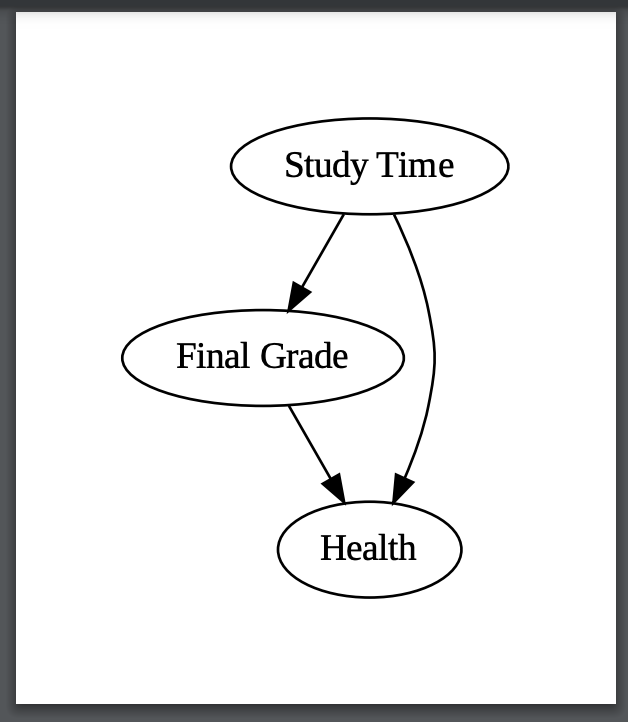

# CONCLUSION

These are just a few causal inference techniques that can be used to determine the causal effects of variables in a dataset.

Successful implementation of these techniques requires a thoughtful consideration of study design, identification of potential biases, and robustness checks. Each method contributes to a nuanced understanding of causality, allowing researchers and practitioners to draw reliable conclusions and make informed decisions based on observational or experimental data. As the field of causal inference continues to evolve, the adoption of these techniques enhances our ability to uncover meaningful insights and contribute to evidence-based decision-making.

# REFERENCES

1. "Causal Inference in Statistics: A Primer" by Pearl, Glymour, and Jewell
2. "The Elements of Statistical Learning" by Hastie, Tibshirani, and Friedman
3. "Mostly Harmless Econometrics" by Angrist and Pischke
4. "https://causalinferenceinpython.org/“

# LICENSE

Copyright (c) 2023 vikpawar22

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.